# Title

# Abstract

# Table of contents <a name="TOC"></a>
1. [Introduction](#intro)
2. [Data aquisition](#data-aquisition)
3. [Data exploration](#data-exploration)

# Introduction <a name="intro"></a>

[Go back to the top](#TOC)

# Data acquisition <a name="data-aquisition"></a>

[Go back to the top](#TOC)

The data we analyse are given by the NTDS course. They can be downloaded from [here](https://linqs-data.soe.ucsc.edu/public/lbc/TerrorAttack.tgz).

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
PATH = "TerrorAttack/"

In [6]:
# Load data
edges_org = pd.read_csv(PATH +'terrorist_attack_loc_org.edges', sep=' ', header=None)
edges = pd.read_csv(PATH +'terrorist_attack_loc.edges', sep=' ', header=None)
labels = pd.read_csv(PATH +'terrorist_attack.labels', sep=' ', header=None)
nodes = pd.read_csv(PATH +'terrorist_attack.nodes', sep='\t', header=None)

# Data exploration <a name="data-exploration"></a>

[Go back to the top](#TOC)

In [40]:
edges.head()

,0,1
0,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
1,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
2,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
3,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
4,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...


In [153]:
edges[0][42]

'http://counterterror.mindswap.org/2005/ict_events.owl#Jihad_Group_19961117'

The edges are given by an internet link. However, there are information given inside the link: the name of the organization after `#` in the link and the date of the attack and the end of the link.  
  
We will extract these information and construct a new data frame.

In [160]:
# extract information of date and organization from the link
nodes_info = nodes[0].apply(lambda x : (x.split("#"))[1])
dates= nodes_info.apply(lambda x : x[-8:])
dates = pd.to_datetime(dates, format='%Y%m%d', errors='coerce')
organizations = nodes_info.apply(lambda x : x[:-9])

attacks_dict = {"organization": organizations, "date": dates}
attacks = pd.DataFrame(attacks_dict)

attacks.head()

,organization,date
0,United_Popular_Action_Movement,1993-05-13
1,Unknown,1996-11-12
2,Unknown,1998-04-28
3,Kurdistan_Worker_s_Party,1997-03-25
4,Unknown,1999-03-14


We observe that there are some unknown organizations. We want to know the number of the unknown values.

In [134]:
attacks.organization.value_counts().head()

Unknown                      519
Hamas                         99
Fatah_Tanzim                  52
Palestinian_Islamic_Jihad     50
                              48
Name: organization, dtype: int64

That is pretty much. We may predict the organization who is responsible of an attack for those unknown author. First, we check the proportion of attacks that are created by known organizations which create at least 10 attacks. In fact, if an organization only have few rows in the `nodes` dataset, it will be difficult to extract information from the limited rows.

In [158]:
attacks[attacks['organization'] == ''] = 'Unknown'

In [159]:
attack_per_org = pd.DataFrame(attacks.organization.value_counts()[1:])
attack_per_org.columns=['count']
num_attacks = attack_per_org.sum()
prop_freq_org = (attack_per_org[attack_per_org['count']>=10].sum() / num_attacks )['count']

print("There are {:.2%} of known attacks are created by frequent organizations.".format(prop_freq_org))

There are 80.30% of known attacks are created by frequent organizations.


Which seems good for us to predict.

In [186]:
# concatenate features into the dataframe of attacks
attacks = pd.concat([attacks, nodes.iloc[:, 1:]], axis=1)
attacks.head()

,organization,date,1,2,3,4,5,6,7,8,...,98,99,100,101,102,103,104,105,106,107
0,United_Popular_Action_Movement,1993-05-13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,http://counterterror.mindswap.org/2005/terrori...
1,Unknown,1996-11-12,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,http://counterterror.mindswap.org/2005/terrori...
2,Unknown,1998-04-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,http://counterterror.mindswap.org/2005/terrori...
3,Kurdistan_Worker_s_Party,1997-03-25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,http://counterterror.mindswap.org/2005/terrori...
4,Unknown,1999-03-14,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,http://counterterror.mindswap.org/2005/terrori...


In [193]:
ls = sorted(attacks.date[attacks.date.notna()])

We will now also have a look on the number of attacks w.r.t time. 

In [246]:
attack_year = [t.year for t in ls]

print("Our data contains attacks start from year {} till {}"
      .format(min(set(attack_year)), max(set(attack_year))))

Our data contains attacks start from year 1969 till 2002


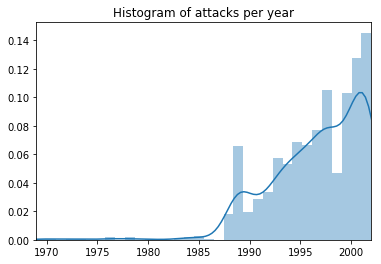

In [247]:
sns.distplot(attack_year, bins=34)
plt.title('Histogram of attacks per year')
plt.xlim([1969,2002]);

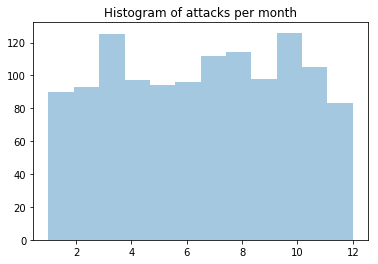

In [251]:
attack_month = [t.month for t in ls]

sns.distplot(attack_month, bins=12, kde=False)
plt.title('Histogram of attacks per month');